In [1]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/style-table.css').read() + open('C:/Users/Michael Roy/Documents\Springboard/pycon-pandas-tutorial-master/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
titles = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/titles.csv', index_col=None)
titles.head()

,title,year
0,Al-suq al-Soda',1945
1,The Invisible Player,2015
2,The Axe Murders of Villisca,2016
3,The Crow Scarer,2014
4,Ves mir v glazakh tvoikh,1979


In [4]:
cast = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


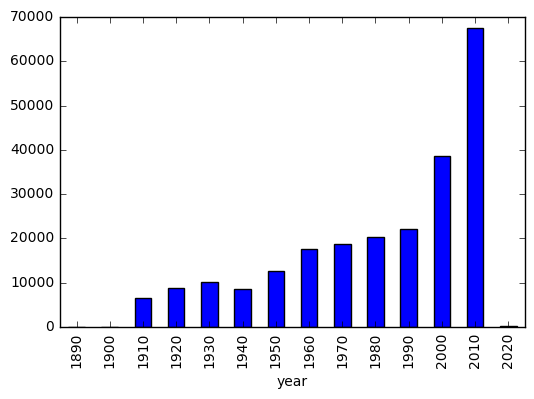

In [8]:
# Using groupby(), plot the number of films that have been released each decade in the history of cinema.
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

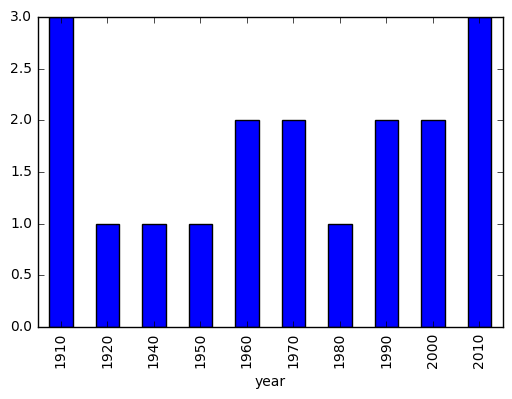

In [11]:
# Use groupby() to plot the number of "Hamlet" films made each decade.
t = titles
t[t.title == "Hamlet"].groupby(t.year // 10 * 10).size().plot(kind='bar')

In [17]:
# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    280
1951  actor      647
      actress    279
1952  actor      607
      actress    290
1953  actor      652
      actress    303
1954  actor      634
      actress    309
1955  actor      641
      actress    281
1956  actor      642
      actress    305
1957  actor      735
      actress    302
1958  actor      708
      actress    294
1959  actor      720
      actress    317
dtype: int64

In [20]:
# In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n <= 5]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6612
     actress    2960
2.0  actor      4560
     actress    4552
3.0  actor      5583
     actress    3145
4.0  actor      5589
     actress    2845
5.0  actor      5606
     actress    2544
dtype: int64

In [28]:
# Use groupby() to determine how many roles are listed for each of the Pink Panther movies.
c = cast
c = c[c.title == "The Pink Panther"]
c.sort('n').groupby(['year'])[['n']].max()#.size()

C:\Users\Michael Roy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,n
year,
1963,15.0
2006,50.0


In [34]:
# List, in order by year, each of the films in which Frank Oz has played more than 1 role.
c = cast
c = c[c.name == "Frank Oz"]
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [53]:
# List each of the characters that Frank Oz has portrayed at least twice.
c = cast
c = c[c.name == "Frank Oz"]
g = c.groupby('character').size()
g[g > 1].sort_values(ascending=False)


character
Yoda              6
Miss Piggy        6
Animal            6
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
dtype: int64